In [3]:
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt
from tabulate import tabulate
from sympy import *
from sympy.plotting import plot

In [10]:
#Function

def plotting_EofT(w):
    #Variables and Constants
    x, t = S('x, t')
    q, m = 1, 1

    time = np.linspace(0,100,1000)
    dt = time[1]

    v0 = Matrix([1,1,1])
    r0 = Matrix([0,0,0])

    #Field Parameters
    B = Matrix([0,0,1])
    E = Matrix([5*sin(w*t),0,0])

    omega = q*B/m
    sigma = q*E/m

    A = omega * dt/2

    v_old = v0
    r_old = r0

    C = v_old + dt*(sigma + v_old.cross(omega/2))

    #Array Generation
    x0, y0 = np.zeros(len(time)), np.zeros(len(time))
    x0[0] = r_old[0]
    y0[0] = r_old[1]

    #Value Subsitution
    for i in range(len(time)-1):
        v_new = (C + A*(A.dot(C)) - A.cross(C)/(1 + A.dot(A))).subs([(x, r_old[0]), (t, time[i])])
        r_new = r_old + v_new*dt
        v_old = v_new
        r_old = r_new
        x0[i+1] = r_new[0]
        y0[i+1] = r_new[1]

    #Plotting
    #plt.figure(dpi = 600)
    plt.plot(time, x0, label = 'x')
    plt.plot(time, y0, label = 'y')
    plt.xlabel('Time [s]')
    plt.ylabel('Position [m]')
    plt.title('4.3, w={}'.format(w))
    plt.legend()
    plt.show()

def plotting_Econst():
    #Variables and Constants
    x, t = S('x, t')
    q, m = 1, 1

    time = np.linspace(0,100,1000)
    dt = time[1]

    v0 = Matrix([1,1,1])
    r0 = Matrix([0,0,0])

    #Field Parameters
    B = Matrix([0,0,1])
    E = Matrix([5,0,0])

    omega = q*B/m
    sigma = q*E/m

    A = omega * dt/2

    v_old = v0
    r_old = r0

    C = v_old + dt*(sigma + v_old.cross(omega/2))

    #Array Generation
    x0, y0 = np.zeros(len(time)), np.zeros(len(time))
    x0[0] = r_old[0]
    y0[0] = r_old[1]

    #Value Subsitution
    for i in range(len(time)-1):
        v_new = (C + A*(A.dot(C)) - A.cross(C)/(1 + A.dot(A))).subs([(x, r_old[0]), (t, time[i])])
        r_new = r_old + v_new*dt
        v_old = v_new
        r_old = r_new
        x0[i+1] = r_new[0]
        y0[i+1] = r_new[1]

    #Plotting
    #plt.figure(dpi = 600)
    plt.plot(time, x0, label = 'x')
    plt.plot(time, y0, label = 'y')
    plt.xlabel('Time [s]')
    plt.ylabel('Position [m]')
    plt.title('4.3, Constant E')
    plt.legend()
    plt.show()

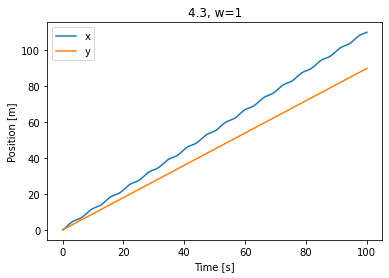

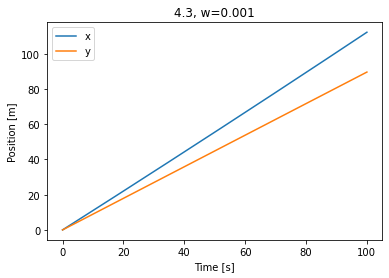

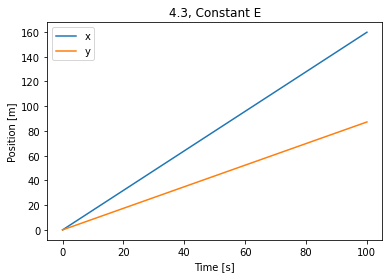

In [11]:
#Plotting
plotting_EofT(1)
plotting_EofT(0.001)
plotting_Econst()